# Checking New ICS Energy Loss Spectra

## Initialization

In [1]:
%load_ext autoreload
import sys
sys.path.append("..")

In [2]:
%autoreload

import matplotlib
matplotlib.rc_file('matplotlibrc')
import matplotlib.pyplot as plt

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [10,10]


from astropy.io import fits

import numpy as np
import pickle
import darkhistory.physics as phys
import darkhistory.utilities as utils
import darkhistory.spec.spectools as spectools
import darkhistory.spec.transferfunction as tf
from darkhistory.spec.spectrum import Spectrum
import darkhistory.history.tla as tla

from darkhistory.electrons.ics.ics_engloss_spectrum import engloss_spec_series
from darkhistory.electrons.ics.ics_engloss_spectrum import engloss_spec_diff

from darkhistory.electrons.ics.bose_einstein_integrals import F_inv_a
from darkhistory.electrons.ics.bose_einstein_integrals import F_inv_n

from darkhistory.electrons.ics.ics_engloss_spectrum import engloss_spec
from darkhistory.electrons.ics.ics_cooling import get_ics_cooling_tf

from scipy.integrate import quad
from scipy.special import hyp2f1

np.set_printoptions(threshold=np.nan,precision=10)

In [3]:
n = 24.
x = np.array([ -199.12*1e6, -2.21, -.503,-.499, 1e-4, 0.496, 0.505, 3.120, 10922.32*1e6])
print(utils.hyp2f1_func_real(n, x))
print(np.real(hyp2f1(1, n+1, n+2, x+0j)))

[ 5.2313512515e-09  3.2023068391e-01  6.7412036657e-01  6.7587085687e-01
  1.0000961631e+00  1.9139898541e+00  1.9463468790e+00 -5.0189354398e-01
 -9.5370458544e-11]
[ 5.2313512536e-09  3.2023068399e-01  6.7412028077e-01  6.7587119894e-01
  1.0000961631e+00  1.9139907309e+00  1.9463469139e+00 -5.0189354429e-01
 -9.5370458582e-11]


In [4]:
nEe = 5000
nEp = 5000

Emax_rel = 1e10
Emin_rel = 1e-8

dlnEp = np.log(Emax_rel/Emin_rel)/nEp
lowengEp = Emin_rel*np.exp((np.arange(nEp)+0.5)*dlnEp)        

dlnEe = np.log(Emax_rel/Emin_rel)/nEe
lowengEe = Emin_rel*np.exp((np.arange(nEe)+0.5)*dlnEe)

In [5]:
# test_series_old = engloss_spec_series(lowengEe, lowengEp, phys.TCMB(1000), spec_type='old')
# print('&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&')
# test_series_new = engloss_spec_series(lowengEe, lowengEp, phys.TCMB(1000), spec_type='new')

In [6]:
# plt.figure()

# plt.contourf(lowengEe, lowengEp, np.log10(np.transpose(test_series_old)), levels=[-18, -16, -14, -12,-10, -8, -6, -4, -2], cmap = 'RdBu')
# plt.colorbar()
# ax = plt.gca()
# ax.set_xscale('log')
# ax.set_yscale('log')

# plt.figure()

# plt.contourf(lowengEe, lowengEp, np.log10(np.transpose(test_series_new)), levels=[-18, -16, -14, -12,-10, -8, -6, -4, -2], cmap = 'RdBu')
# plt.colorbar()
# ax = plt.gca()
# ax.set_xscale('log')
# ax.set_yscale('log')

# plt.figure()

# plt.contourf(lowengEe, lowengEp, np.transpose(test_series_new/test_series_old), levels=[0.8, 0.9, 0.95, 1., 1.05, 1.10, 1.20, 1.40], cmap = 'RdBu')
# plt.colorbar()
# ax = plt.gca()
# ax.set_xscale('log')
# ax.set_yscale('log')

In [7]:
# test_spec_diff_old = engloss_spec_diff(lowengEe, lowengEp, phys.TCMB(1000), spec_type='old')
# test_spec_diff_new = engloss_spec_diff(lowengEe, lowengEp, phys.TCMB(1000), spec_type='new')

In [8]:
# plt.figure()

# plt.contourf(lowengEe, lowengEp, np.log10(np.transpose(test_spec_diff_old)), levels=[-18, -16, -14, -12,-10, -8, -6, -4, -2], cmap = 'RdBu')
# plt.colorbar()
# ax = plt.gca()
# ax.set_xscale('log')
# ax.set_yscale('log')

# plt.figure()

# plt.contourf(lowengEe, lowengEp, np.log10(np.transpose(test_spec_diff_new)), levels=[-18, -16, -14, -12,-10, -8, -6, -4, -2], cmap = 'RdBu')
# plt.colorbar()
# ax = plt.gca()
# ax.set_xscale('log')
# ax.set_yscale('log')

# plt.figure()

# plt.contourf(lowengEe, lowengEp, np.transpose(test_spec_diff_new/test_spec_diff_old), levels=[0.8, 0.9, 0.95, 1., 1.05, 1.10, 1.20, 1.40], cmap = 'RdBu')
# plt.colorbar()
# ax = plt.gca()
# ax.set_xscale('log')
# ax.set_yscale('log')

In [9]:
%%prun
# test_spec_old = engloss_spec(lowengEe, lowengEp, phys.TCMB(1000), nonrel=True, spec_type='old')
test_spec_new = engloss_spec(lowengEe, lowengEp, phys.TCMB(1000), nonrel=True, spec_type='new')

Computing nonrelativistic energy loss spectrum...
Computing energy loss spectrum by beta expansion...
Computing integrals 1/6...
Computing integrals 2/6...
Computing integrals 3/6...
Computing integrals 4/6...
Computing integrals 5/6...
Computing integrals 6/6...
Integrals computed!
Computation by expansion in beta complete!
Computing energy loss spectrum by analytic series...
Computing upscattering loss spectra...
Computing series 1/7...
Computing series 2/7...
Computing series 3/7...
Computing series 4/7...
Computing series 5/7...
Computing series 6/7...
Computing series 7/7...
Computing downscattering loss spectra...
Computing series 1/7...
Computing series 2/7...
Computing series 3/7...
Computing series 4/7...
Computing series 5/7...
Computing series 6/7...
Computing series 7/7...
Computing additional spectra for new spec_type...
Computing series 1/2...
Computing series 2/2...
Nonrelativistic energy loss spectrum computed!
 

/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10


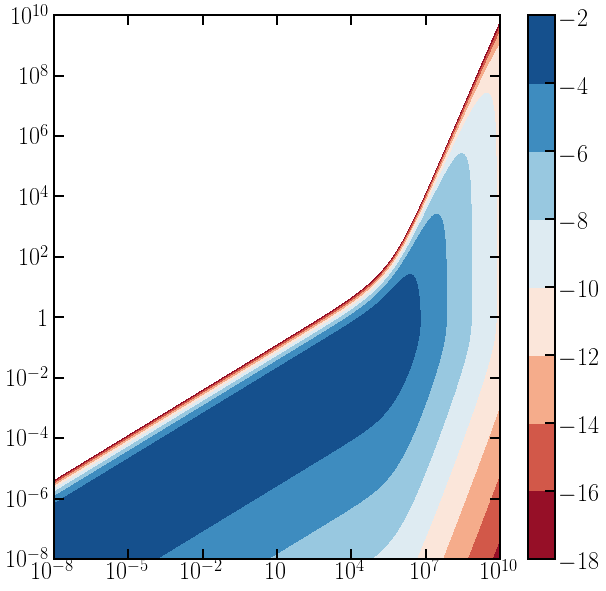

In [10]:
# plt.figure()

# plt.contourf(lowengEe, lowengEp, np.log10(np.transpose(test_spec_old._grid_vals)), levels=[-18, -16, -14, -12,-10, -8, -6, -4, -2], cmap = 'RdBu')
# plt.colorbar()
# ax = plt.gca()
# ax.set_xscale('log')
# ax.set_yscale('log')

plt.figure()

plt.contourf(lowengEe, lowengEp, np.log10(np.transpose(test_spec_new._grid_vals)), levels=[-18, -16, -14, -12,-10, -8, -6, -4, -2], cmap = 'RdBu')
plt.colorbar()
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

# plt.figure()

# plt.contourf(lowengEe, lowengEp, np.transpose(test_spec_new._grid_vals/test_spec_old._grid_vals), levels=[0.8,1.0, 1.2,1.4, 1.6,1.8, 2,2.2], cmap = 'RdBu')
# plt.colorbar()
# ax = plt.gca()
# ax.set_xscale('log')
# ax.set_yscale('log')

In [11]:
data = test_spec_new._grid_vals
np.savetxt('/users/hongwan/Dropbox (MIT)/thomson_engloss_table_new.dat', data)